# Chargement des données

In [12]:
import pandas as pd

df = pd.read_csv("DataSet_Emails.csv")
# Aperçu de la structure
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB
None


,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13
5,5,15726,"emerging growth stock profile vera ,\nvcsc - b...",1,spam,emerging growth stock profile,"vera ,\nvcsc - brand new stock for your attent...",2005-01-18
6,6,21384,internet provider abuse i noticed that you hav...,1,spam,internet provider abuse,i noticed that you have visited illegal websit...,2005-02-24
7,7,9556,[ avfs ] romanian software production & export...,1,spam,[ avfs ] romanian software production & export,to : avfs @ fazekas . hu\nattn : marketing dep...,2002-04-21
8,8,5458,fortune most admired ranking congratulations !...,0,ham,fortune most admired ranking,congratulations ! for an unprecedented five ye...,2000-02-07
9,9,11027,"localized software , all languages available ....",1,spam,"localized software , all languages available .","hello , we would like to offer localized softw...",2005-07-22


- Notre jeu de données contient 31 716 lignes (ou emails), indexées de 0 à 31 715
- Le DataFrame est composé de 8 colonnes au total.
- text (type object): C'est le corps de l'email, le texte principal que notre modèle analysera.
- label (type int64) et label_text (type object): Ces deux colonnes sont vos variables cibles (les étiquettes). 
- label est l'étiquette numérique (probablement 0 pour ham et 1 pour spam), tandis que label_text est la version textuelle (ham, spam, etc.).
- subject (type object): Le sujet de l'email. Il y a 274 valeurs manquantes. Le sujet est une information très pertinente pour la détection de spams, donc il serait judicieux de l'intégrer au texte principal de l'email après avoir géré les valeurs manquantes.
- date (type object): La date d'envoi de l'email. Cette colonne est complète. Sauf si vous prévoyez une analyse temporelle, cette variable n'est probablement pas nécessaire pour la détection de spam en elle-même.

# Analyse exploratoire des données (EDA) 

**1. Identifier les valeurs manquantes et les doublons**

In [13]:
df.isnull().sum()

Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

Affiche le nombre de valeurs manquantes par colonne
- text 51 valeurs manquantes (il est mieux de les supprimer puisque ce nombre est négligeable devant 31715)
- subject 274 valeurs manquantes
- message 345 valeurs manquantes 

In [15]:
# Suppression des lignes avec des valeurs manquantes dans les colonnes spécifiées
df.dropna(subset=['text', 'subject', 'message'], inplace=True)
print(df.isnull().sum())

Unnamed: 0    0
message_id    0
text          0
label         0
label_text    0
subject       0
message       0
date          0
dtype: int64


Pour vérifier si les valeurs manquantes ont bien été supprimées

**2. Analyser la distribution des variables**

In [16]:
df.duplicated().sum()

np.int64(0)

**3. Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.**

Dans notre cas, les colonnes message_id, label et Unnamed sont numériques.

In [17]:
correlation_matrix = df[['message_id', 'label']].corr()
print("Matrice de Corrélation :\n", correlation_matrix)

Matrice de Corrélation :
             message_id     label
message_id    1.000000  0.520872
label         0.520872  1.000000


Calcul de la matrice de corrélation pour les variables numériques

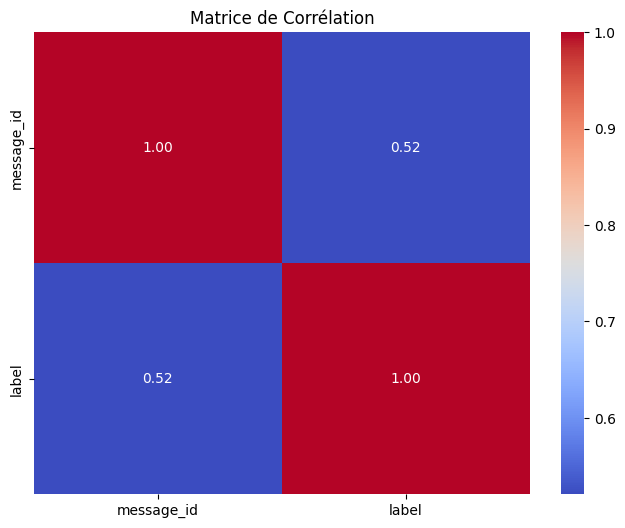

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

- La visualisation la plus courante pour une matrice de corrélation est une carte de chaleur (heatmap) avec la bibliothèque seaborn.
- Pour les variables catégorielles comme label_text et la variable cible label, il est plus efficace d'utiliser des visualisations basées sur la fréquence ou la proportion.

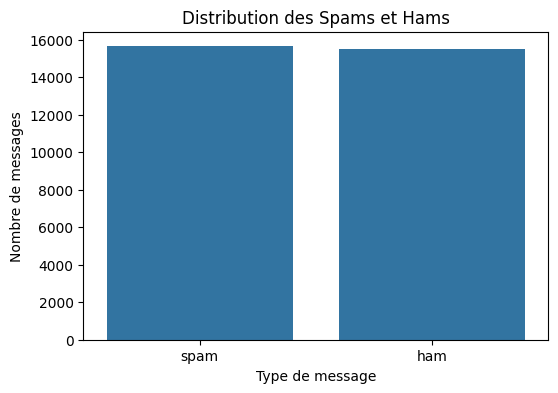

In [19]:
# Visualisation de la distribution de la variable cible 'label_text'
plt.figure(figsize=(6, 4))
sns.countplot(x='label_text', data=df)
plt.title('Distribution des Spams et Hams')
plt.xlabel('Type de message')
plt.ylabel('Nombre de messages')
plt.show()

Le graphique montre que notre jeu de données est parfaitement équilibré en termes de nombre d'emails de type "spam" et "ham". Il y a un nombre quasiment égal d'exemples dans chaque classe.

C'est une excellente nouvelle pour l'apprentissage automatique, car cela signifie que votre modèle ne sera pas biaisé en faveur de l'une des classes. Il n'est pas nécessaire d'appliquer des techniques de rééchantillonnage comme l'oversampling ou l'undersampling pour corriger un déséquilibre de classes, ce qui simplifie le processus d'entraînement.

**4. Créer un nuage pour les mots fréquents dans les spams et un autre pour les emails légitimes (ham).**

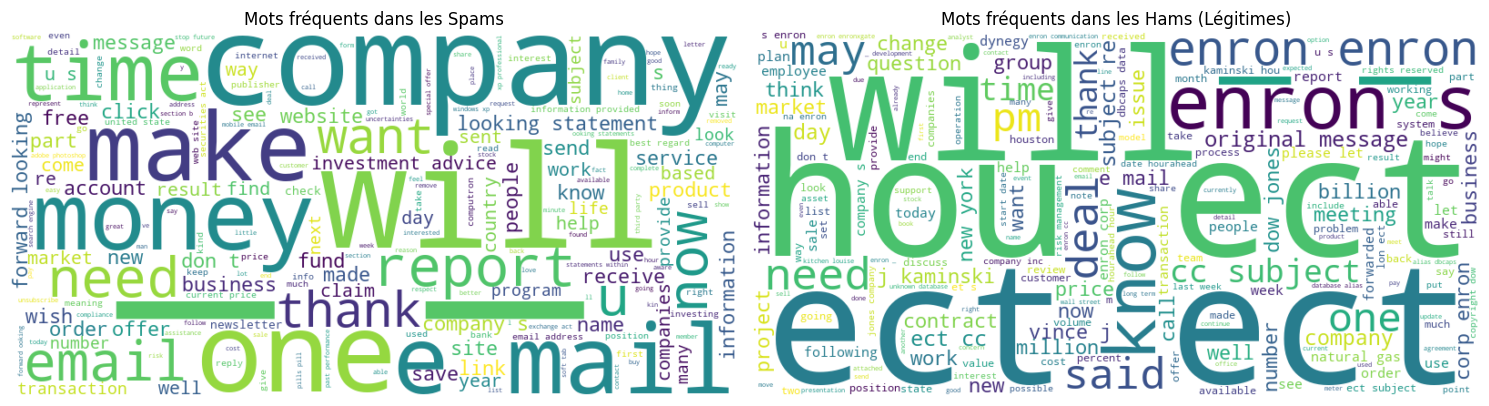

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Séparer les emails en deux catégories
spam_emails = df[df['label_text'] == 'spam']['text']
ham_emails = df[df['label_text'] == 'ham']['text']

# Concaténer tout le texte pour chaque catégorie
spam_text = ' '.join(spam_emails)
ham_text = ' '.join(ham_emails)

# Créer un nuage de mots pour les spams
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Créer un nuage de mots pour les hams
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Afficher les deux nuages de mots
plt.figure(figsize=(15, 7))

# Nuage de mots pour les Spams
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Mots fréquents dans les Spams')
plt.axis('off')

# Nuage de mots pour les Hams
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Mots fréquents dans les Hams (Légitimes)')
plt.axis('off')

plt.tight_layout()
plt.show()

Créer des nuages de mots est une excellente façon de visualiser les termes les plus fréquents et d'obtenir une première intuition sur les différences linguistiques entre les spams et les emails légitimes.

# Prétraitement du texte

**1. Convertir tout le texte en minuscules : text.lower().**

In [21]:
df['text'] = df['text'].str.lower()
print(df['text'].head(10))

0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
5    emerging growth stock profile vera ,\nvcsc - b...
6    internet provider abuse i noticed that you hav...
7    [ avfs ] romanian software production & export...
8    fortune most admired ranking congratulations !...
9    localized software , all languages available ....
Name: text, dtype: object


**2. Supprimer les doublons dans les données.**

In [23]:
nombre_doublons = df.duplicated().sum()
print(f"Nombre de doublons trouvés : {nombre_doublons}")

Nombre de doublons trouvés : 0


📌 on n'a pas de valeurs doublant a supprimer

**3. Identifier les valeurs manquantes et supprimer les lignes où la colonne text est vide ou manquante**

📌 déjà fait avant

In [34]:
import pandas as pd
nombre_valeurs_manquantes = df['text'].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne 'text' : {nombre_valeurs_manquantes}")

Nombre de valeurs manquantes dans la colonne 'text' : 0


# Appliquer la tokenisation : nltk.word_tokenize(text)

**4. Supprimer les stopwords (mots vides) avec nltk.corpus.stopwords.words('english').**

In [35]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))  # Obtenir la liste des stopwords en anglais

def remove_stopwords(text):
    tokens = word_tokenize(text) # Tokenisation du texte
    filtered_tokens = [word for word in tokens if word not in stop_words] # Filtrer les stopwords
    return " ".join(filtered_tokens) # Reconstruire la phrase

# Appliquer la fonction de suppression des stopwords à la colonne 'text'
df['text'] = df['text'].apply(remove_stopwords)

# Afficher les premières lignes pour vérifier le résultat
print(df['text'].head())


0    software 15 $ - 99 $ understanding oem softwar...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive ? vi...
3    enron / hpl actuals december 11 , 2000 teco ta...
4    looking cheap high - quality software ? rotate...
Name: text, dtype: object


**5. Supprimer la ponctuation et les caractères spéciaux à l’aide de re.sub() ou string.punctuation.**

In [38]:
import re
import string

def remove_punctuation(text):
    # Combinaison de toutes les ponctuations de la bibliothèque string
    punctuation_to_remove = string.punctuation
    
    # Remplacer chaque caractère de ponctuation par une chaîne vide
    translator = str.maketrans('', '', punctuation_to_remove)
    return text.translate(translator)

# Appliquer la fonction de suppression de la ponctuation à la colonne 'text'
df['text'] = df['text'].apply(remove_punctuation)

# Afficher les premières lignes pour vérifier le résultat
print(df['text'].head())

0    software 15   99  understanding oem software l...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive  via...
3    enron  hpl actuals december 11  2000 teco tap ...
4    looking cheap high  quality software  rotated ...
Name: text, dtype: object


**6. Appliquer le stemming avec PorterStemmer() de NLTK pour réduire les mots à leur racine.**

In [41]:
import nltk
from nltk.stem.porter import PorterStemmer

# Instancier le PorterStemmer
ps = PorterStemmer()

def apply_stemming(tokens):
    # Appliquer le stemming à chaque mot
    stemmed_tokens = [ps.stem(word) for word in tokens]
    return stemmed_tokens

# Appliquer la fonction de stemming à la colonne 'tokens'
df['stemmed_tokens'] = df['tokens'].apply(apply_stemming)

# Afficher les premières lignes pour vérifier le résultat
print(df[['tokens', 'stemmed_tokens']].head())

KeyError: 'tokens'

# Extraction des caractéristiques